# Job Placement Predictor

This project builds a model that predicts whether a student can get job 
placement opportunity after graduating based on his/her academic performance, work experiences, projects etc. 

## Project Work Flow

1. Load the data into a dataframe
2. Perform Data Preprocessing like handling missing values, feature creation etc.
3. Perform Eploratory Data Analysis and get valuable insights from the data
4. Perform feature selection and select the best algorithm which fits the data
5. Save the model in a pickle file

In [1]:
# import libriaries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# load data set
df = pd.read_csv("Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


There are two types of data types in the data set. The `int64` and `object` data sets.

We can see that the `salary` column has null values.

We will be separating the categorical and numerical columns.

In [4]:
# Seperating te categorical and numerical columns
cat_col = list(df.select_dtypes(include=["object"]).columns)
num_col = list(df.select_dtypes(exclude=["object"]).columns)

print(cat_col, num_col)

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'] ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [5]:
# check for null values
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

The salary column has 67 null values.

### Handling Null values

In [6]:
# view the shape of the data frame
df.shape

(215, 15)

In [7]:
# write a function that plots distribution to help us fill in the missing
# values
def plot_kedplot(col):
    
    plt.figure(figsize=(10, 7))
    sns.kdeplot(df["salary"], label="Actual Salary", color="orange")
    sns.kdeplot(df[col], color="black", label=col)
    plt.title(col.upper())
    plt.legend()

In [8]:
# get the mode frequent salary value
df["salary"].mode()[0]

300000.0

In [9]:
list(dict(df["salary"].value_counts()).items())[0]

(300000.0, 22)

We can see that the most frequent salary value is 300,000

In [10]:
# fill in the missing salary values with the mean, mode and median
# and compare and choose the best option
df["salary_mean"] = df["salary"].fillna(df["salary"].mean())
df["salary_median"] = df["salary"].fillna(df["salary"].median())
df["salary_mode"] = df["salary"].fillna(df["salary"].mode()[0])

# view the head of the data frame
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_median,salary_mode
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,200000.000000,200000.0,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,250000.000000,250000.0,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,288655.405405,265000.0,300000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,425000.000000,425000.0,425000.0


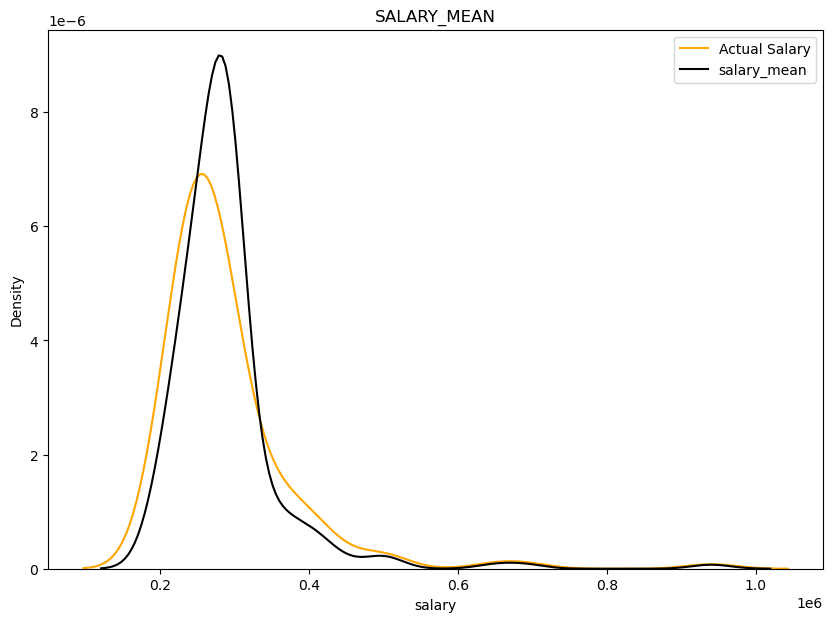

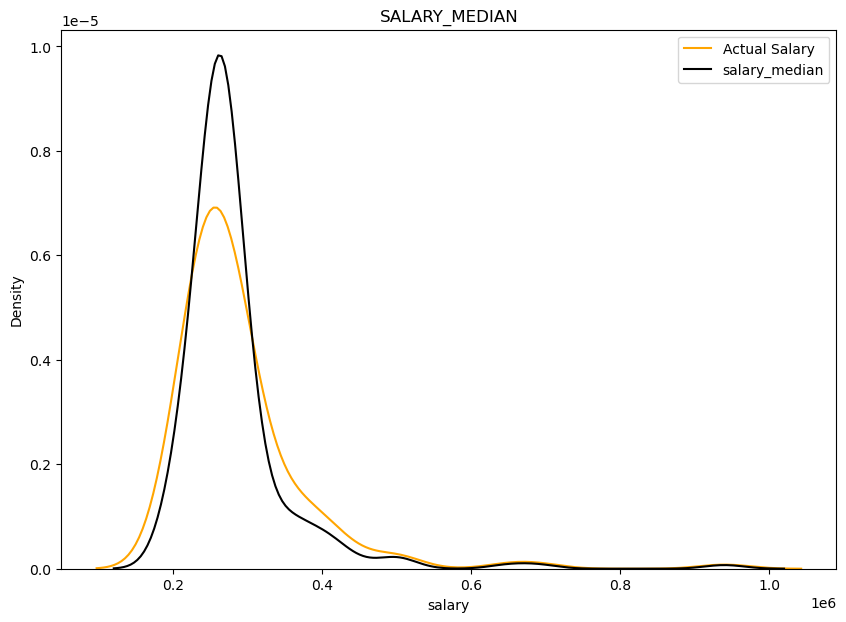

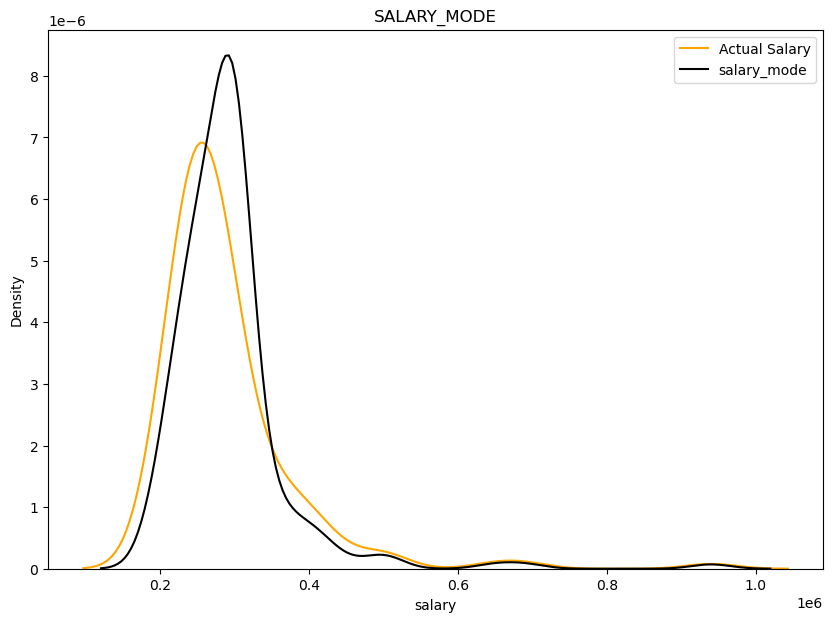

In [11]:
# plot the kde plot fo salary and the 3 added salay types
salary_list = ['salary_mean', 'salary_median', 'salary_mode']

for sal in salary_list:
    plot_kedplot(sal)

From the out put of the graphs mean and mode closely represent the missing salary values but we will be opting to fill the missing salary values with the mean because 67 of the total 215 values will be filled.

In [12]:
# fill salary with mean 
df["salary"] = df["salary"].fillna(df["salary"].mean())

In [13]:
# drop the other salary columns
df.drop(columns=['salary_mean', 'salary_median', 'salary_mode'], 
        inplace=True)

In [14]:
# check for missing values
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

There are no more null values.

In [15]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


## Exploratory Data Analysis

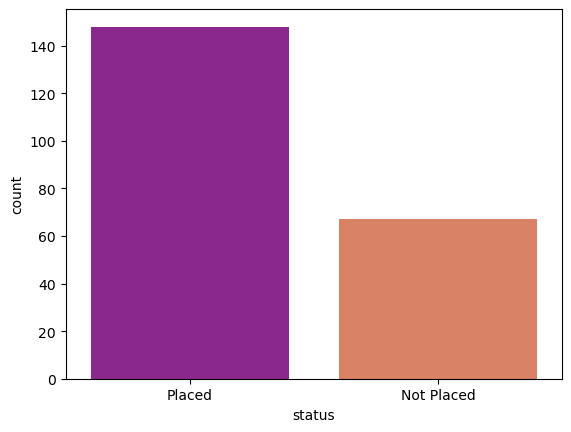

In [16]:
# get the count plot of the target label
sns.countplot(x="status", data=df, palette="plasma");

Count plot for feature gender is shown in the graph below 


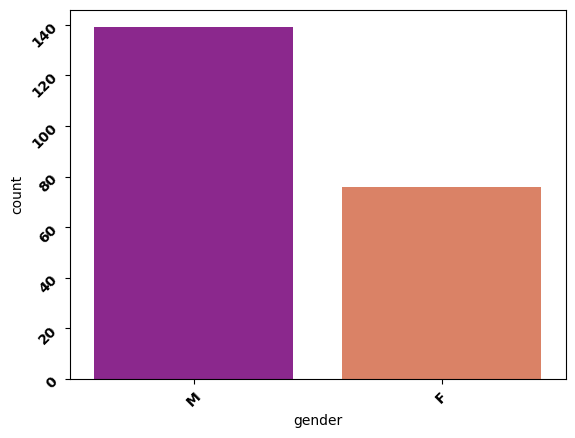

........................................................................... 

Count plot for feature ssc_b is shown in the graph below 


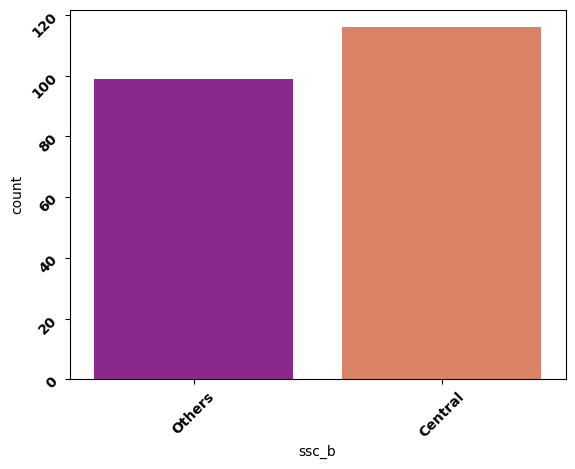

........................................................................... 

Count plot for feature hsc_b is shown in the graph below 


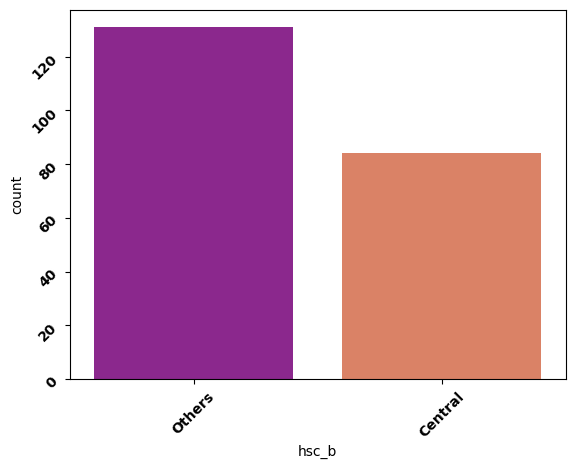

........................................................................... 

Count plot for feature hsc_s is shown in the graph below 


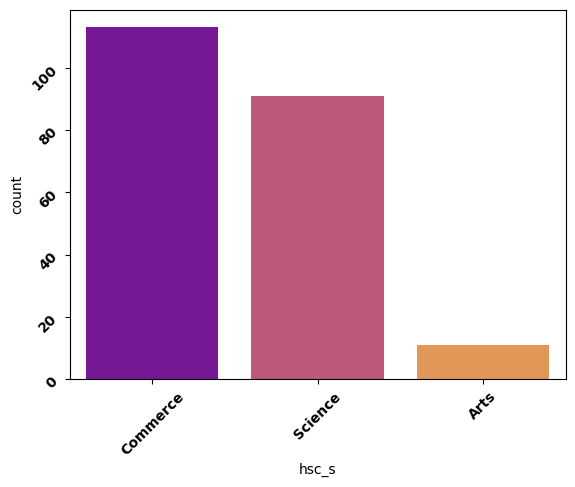

........................................................................... 

Count plot for feature degree_t is shown in the graph below 


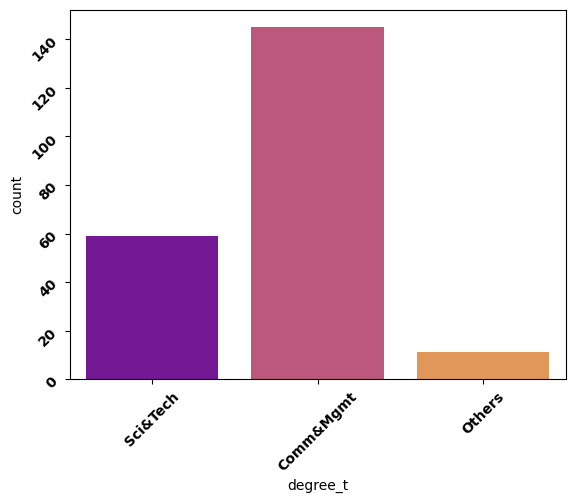

........................................................................... 

Count plot for feature workex is shown in the graph below 


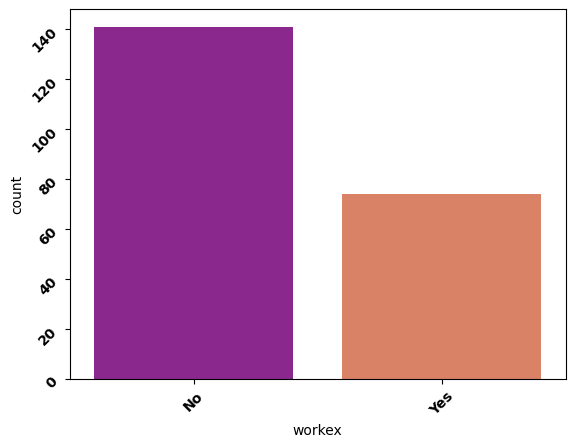

........................................................................... 

Count plot for feature specialisation is shown in the graph below 


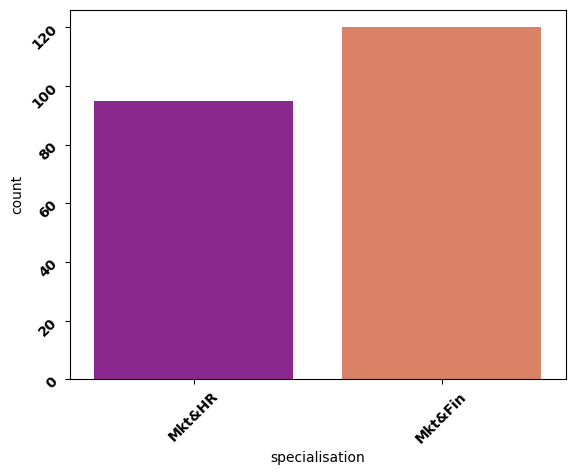

........................................................................... 

Count plot for feature status is shown in the graph below 


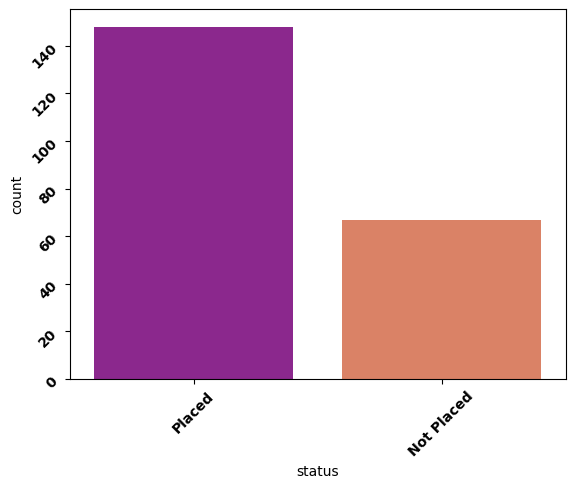

........................................................................... 



In [17]:
# write a function that gets the value count of a column
def value_count(col):
    return dict(df[col].value_counts())

# write a function that plots count plot
def get_count_plot(col):
    
    sns.countplot(x=col, data=df, palette="plasma")
    plt.xticks(rotation = 45, fontweight = 'bold',fontsize = '10')
    plt.yticks(rotation = 45, fontweight = 'bold',fontsize = '10')
    plt.show()
    
# iterate through categorical columns and plot
for col in cat_col:
    print(f"Count plot for feature {col} is shown in the graph below ")
    get_count_plot(col)
    print("." *75, "\n")

In [18]:
# lets get the value counts
cat_value_count_dict = {}

for col in cat_col:
    cat_value_count_dict[col] = value_count(col)
    
cat_value_count_dict

{'gender': {'M': 139, 'F': 76},
 'ssc_b': {'Central': 116, 'Others': 99},
 'hsc_b': {'Others': 131, 'Central': 84},
 'hsc_s': {'Commerce': 113, 'Science': 91, 'Arts': 11},
 'degree_t': {'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11},
 'workex': {'No': 141, 'Yes': 74},
 'specialisation': {'Mkt&Fin': 120, 'Mkt&HR': 95},
 'status': {'Placed': 148, 'Not Placed': 67}}

In [19]:
# Let get the top 5 earning science graduates that were placed
df[(df["degree_t"]=="Sci&Tech")&(df["status"]=="Placed")].sort_values(by="salary", ascending=False).reset_index().head(5)

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
1,77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
2,163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
3,174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
4,53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0


In [20]:
# Let get the top 5 earning Comm&Mgmt grduates that were placed
df[(df["degree_t"]=="Comm&Mgmt")&(df["status"]=="Placed")].sort_values(by="salary", ascending=False).reset_index().head(5)

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,119,120,M,60.8,Central,68.4,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
1,177,178,F,73.0,Central,97.0,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
2,4,5,M,85.8,Central,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
3,95,96,M,73.0,Central,78.0,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
4,210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.0


In [21]:
# Get the maximun and minimum salary

df[(df["salary"]==max(df["salary"])) | (df["salary"]==min(df["salary"]))]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
15,16,F,65.00,Central,75.00,Central,Commerce,69.00,Comm&Mgmt,Yes,72.00,Mkt&Fin,64.66,Placed,200000.0
44,45,F,77.00,Others,73.00,Others,Commerce,81.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,69.70,Placed,200000.0
50,51,F,75.20,Central,73.20,Central,Science,68.40,Comm&Mgmt,No,65.00,Mkt&HR,62.98,Placed,200000.0
107,108,M,82.00,Others,90.00,Others,Commerce,83.00,Comm&Mgmt,No,80.00,Mkt&HR,73.52,Placed,200000.0
119,120,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
135,136,F,72.00,Central,56.00,Others,Science,69.00,Comm&Mgmt,No,55.60,Mkt&HR,65.63,Placed,200000.0


In [22]:
# graduates with salary > average and from Sci&Tech

df[(df["degree_t"]=="Sci&Tech")&(df["salary"]>df["salary"].mean())].sort_values(by="salary", ascending=False).reset_index()

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
1,174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.00,Mkt&Fin,66.23,Placed,500000.0
2,77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.00,Mkt&Fin,57.65,Placed,500000.0
3,163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.00,Mkt&Fin,66.46,Placed,500000.0
4,53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.00,Mkt&HR,71.04,Placed,450000.0
5,39,40,M,81.00,Others,68.00,Others,Science,64.00,Sci&Tech,No,93.00,Mkt&Fin,62.56,Placed,411000.0
6,145,146,M,89.40,Others,65.66,Others,Science,71.25,Sci&Tech,No,72.00,Mkt&HR,63.23,Placed,400000.0
7,128,129,M,80.40,Central,73.40,Central,Science,77.72,Sci&Tech,Yes,81.20,Mkt&HR,76.26,Placed,400000.0
8,22,23,F,69.80,Others,60.80,Others,Science,72.23,Sci&Tech,No,55.53,Mkt&HR,68.81,Placed,360000.0
9,24,25,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000.0


In [23]:
# graduates with salary > average and from Comm&Mgmt

df[(df["degree_t"]=="Comm&Mgmt")&(df["salary"]>df["salary"].mean())].sort_values(by="salary", ascending=False).reset_index()

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,119,120,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
1,177,178,F,73.00,Central,97.00,Others,Commerce,79.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
2,4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
3,95,96,M,73.00,Central,78.00,Others,Commerce,65.00,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
4,85,86,F,83.84,Others,89.83,Others,Commerce,77.20,Comm&Mgmt,Yes,78.74,Mkt&Fin,76.18,Placed,400000.0
5,210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.0
6,21,22,F,79.00,Others,76.00,Others,Commerce,85.00,Comm&Mgmt,No,95.00,Mkt&Fin,69.06,Placed,393000.0
7,101,102,M,63.00,Central,72.00,Central,Commerce,68.00,Comm&Mgmt,No,78.00,Mkt&HR,60.44,Placed,380000.0
8,104,105,M,69.00,Central,63.00,Others,Science,65.00,Comm&Mgmt,Yes,55.00,Mkt&HR,58.23,Placed,360000.0
9,57,58,M,68.00,Central,76.00,Central,Commerce,74.00,Comm&Mgmt,No,80.00,Mkt&Fin,63.59,Placed,360000.0


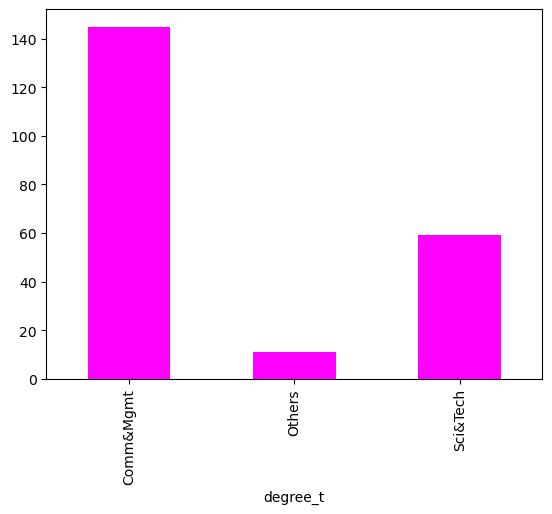

In [28]:
# Maximun students placed from cpmm&mgt

df.groupby(["degree_t"])["status"].count().plot(kind="bar", color="magenta");

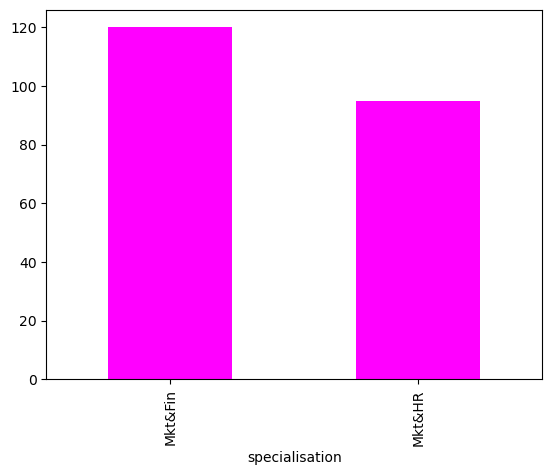

In [30]:
# Marketing and Finance specialization are placed more

df.groupby(["specialisation"])["status"].count().plot(kind="bar", color="magenta");

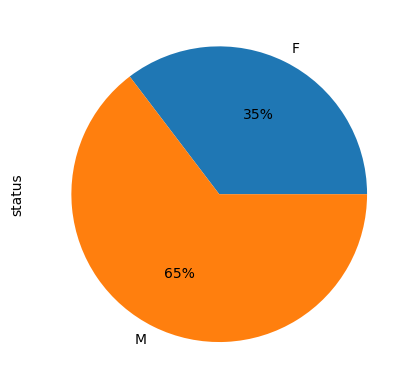

In [33]:
# femal are placed 35% and male 65% 

df.groupby(["gender"])["status"].count().plot(kind="pie", autopct="%1.0f%%");

In [35]:
# maximum female salary ~ 650,000
temp = df[df["gender"]=="F"]
temp[temp["salary"]==max(temp["salary"])]style.backgraound_gradient(cmap="plasma")

SyntaxError: invalid syntax (2423548884.py, line 3)